# Code Asylums - ML Session Series

## Machine Learning(ML) vs Artificial Intelligence(AI) vs Deep Learning(DL) vs Data Science(DS):
    AI: Umbrella Category. Concerned with providing human-level intelligence to machines. It should be able to mimic human cognitive functions to learn and perceive the surrounding environment and apply the gained intelligence for problem-solving.
    
    ML: Subset of AI. Ability of a machine to perform tasks(often human-like) without being explicitly programmed with instructions. Instead, it uses huge amount of data to learn. ML is approach to AI. We can do similar things by providing explicit instructions, but that will take millions of lines of code.
    
    DL: It is further subset of ML and another approach to AI. Here both the amount of data involved and computation involved is significantly higher than normal machine learning models. It mostly mimics human brain like architectures(Neural Networks) to learn from data. Unlike ML, where focus is on sepcifi algorithm, DL focuses on solely data to understand data representation.
    One significant difference between ML and DL is that you need to manually provided features to work-upon (not always,for eg: Decision Trees and Random Forests), while in DL, it automatically discovers the features to be used.
    
    DS: It is set of tools and algorithms to analyze and extract interesting patterns and insights from data. It is often achieved via predefined algorithms and statistical models. It's focus is more on Business activities instead of cognitive behavior. It also uses ML to achieve it's goals.

    
    

### Pandas tutorials:
https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook https://realpython.com/python-data-cleaning-numpy-pandas/

https://realpython.com/pandas-dataframe/#further-reading https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

# Decision Trees

Decision Trees are part of CART which stands for 'Classsification' & 'Regression' Trees
* Classification Trees - Where you answer in terms of yes/no or other classes in question.
* Regression Trees - Where you predict the outcome based on given conditions. This outcome is usually
answered as the mean of all values or other such metrics like median, mode etc.

* Type of Supervised Learning Algorithm, where you have a predefined target variable.

### -------------------------------------------

* A Decision tree works by splitting your data into multiple parts. 
* Primary Goal is to split the data into homogenous groups.
* These splits are made by the algorithm
in use based on some statistical Criteria like 'Gini Impurity', 'Information Entropy' or 'Information Gain', etc for classification and Mean Squared Error(MSE) or Mean absolute Error(MAE) or for regression.

* Gini Index is the good indicator of Node Purity as it is measured as the probability of classifying the points incorrectly.

* Information entropy is basically the measure that denotes whether splitting the data will help to
increase the information being given/represented by the splitted group.

* A DT stops when the further split is not able to add any information to the data or when some stop
condition is met(usually set by the user or the underlaying algorithm).

### -------------------------------------------
DT Algorithms:
1. CART (Classification and Regression Trees) - Uses Gini Index.
2. CHAID (Chi-Square Automatic Interaction Detector - Uses Chi-Square value to Split.
3. ID3(Iterative Dichotomiser) - Uses Information Gain. 

References:
* https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
* https://hackernoon.com/what-is-a-decision-tree-in-machine-learning-15ce51dc445d (Brandon's other articles are good as well)

### Decision Tree Classifier - Classification Tree

In [1]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Pandas - Dataframes - series
 - series - 1D Array
 

In [4]:
x = pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
# import data
dataset = pd.read_csv(r"C:\Users\ikhurana\OneDrive - Intel Corporation\Documents\Code-asylums\pima_indian_diabetes.csv")

In [9]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# Split dataset into Features and target variables
# Features is usually referred to as X
# Target variables is usually referred to y.
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8:]

In [0]:
# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [0]:
# build model
# create classifier instance
#classifier = DecisionTreeClassifier(criterion="entropy")
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# train the classifier
classifier=classifier.fit(X_train, y_train)

# make prediction
y_pred = classifier.predict(X_test)

In [0]:
# Evaluate Model Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7705627705627706


In [0]:
# visualizing Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

def visualize_tree(classifier, features, img_name):
    dot_data = StringIO()
    export_graphviz(classifier, out_file = dot_data, filled = True, 
                    rounded = True, special_characters = True,
                    feature_names = features, class_names = ['0', '1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(img_name)
    Image(graph.create_png())

In [0]:
visualize_tree(classifier, list(X.columns),'initial_tree.png')

In [0]:
# Build classifie again by putting pruning step. max_depth = 3 and check
# accuracy and tree image again

## Random Forest - Classifier

* part of CART as well
* supervised learning algorithms
* can be used for both classification and Regression

### ---------------------------
Randomness of Random Forest come from 2 factors:
1. Random samples are selected from given dataset.
       -- Usually, sqrt(p) predictors gives the best result
2. At each node, random number of features are selected.

### ---------------------------
Output Selection:
1. Classification: Select the one with maximum votes
2. Regression: Take Mean/Mode/Median of the final values.



In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
# build classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy')

# train classifier
rf_classifier = rf_classifier.fit(X_train, y_train["Outcome"])
X_train.shape
# predict from classifier
y_pred_rf = rf_classifier.predict(X_test)

In [0]:
# Evaluate Model Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy:  0.7835497835497836


### Finding important features from Random Forest Classifier

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# to print generated plot in notebook only.
%matplotlib inline 

def draw_feature_importance(imp_features):
  sns.barplot(x = imp_features, y = imp_features.index)
  plt.xlabel("Feature Importance Score")
  plt.ylabel('Features')
  plt.title('Important Features')
  plt.legend()
  plt.show()
 

In [0]:
imp_features = pd.Series(rf_classifier.feature_importances_, index = list(X.columns))
imp_features

Pregnancies                 0.078570
Glucose                     0.223791
BloodPressure               0.098293
SkinThickness               0.073991
Insulin                     0.074523
BMI                         0.179764
DiabetesPedigreeFunction    0.133596
Age                         0.137472
dtype: float64

No handles with labels found to put in legend.


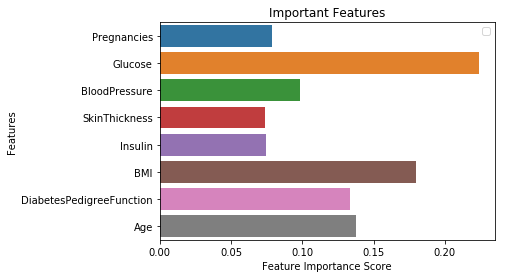

In [0]:

draw_feature_importance(imp_features)

In [0]:
# Create data set of important features
new_X = dataset[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
#new_X = dataset[['Glucose', 'BMI']]
new_y = dataset['Outcome']

In [0]:
# split into train and test
nX_train, nX_test, ny_train, ny_test = train_test_split(new_X, new_y, test_size = 0.30, random_state = 1) 

In [0]:
new_rf_classifier = RandomForestClassifier(n_estimators = 100)


new_rf_classifier = new_rf_classifier.fit(nX_train, ny_train)

ny_pred_rf = new_rf_classifier.predict(nX_test)

In [0]:
# Evaluate Model Accuracy
print("Accuracy: ", metrics.accuracy_score(ny_test, ny_pred_rf))

Accuracy:  0.7705627705627706
